# Importing data

In [49]:
#General use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Text deep cleaning
import re, string
import emoji
from sklearn.preprocessing import LabelEncoder

#NLP
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Torch dataset
import torch
from torch.utils.data import DataLoader

#Optimizer/evaluator
from transformers import AdamW
from sklearn.metrics import classification_report

#Model
from transformers import BertTokenizer, BertForSequenceClassification

In [50]:
sentiment = pd.read_csv("E:/Coding/sem5/NLP/Sentiment1.csv", encoding='latin1')
train = pd.read_csv("E:/Coding/sem5/NLP/Train1.csv", encoding='latin1')

In [51]:
sentiment.head()

,Date,Text,Username,Length_Text,Sentiment
0,Wed Dec 13 23:47:11 +0000 2023,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,DzulfiqorParisi,254,Negative
1,Wed Dec 13 23:46:34 +0000 2023,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...",sumadiseloguno,222,Positive
2,Wed Dec 13 23:43:39 +0000 2023,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,AlfathMelfas,281,Negative
3,Wed Dec 13 23:36:50 +0000 2023,Kagum dgn senyum pak Anies yg teteup tersunggi...,SBahriTweet,216,Positive
4,Wed Dec 13 23:36:04 +0000 2023,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,samask_1,161,Neutral


In [52]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1336 non-null   object
 1   Text         1336 non-null   object
 2   Username     1336 non-null   object
 3   Length_Text  1336 non-null   int64 
 4   Sentiment    1336 non-null   object
dtypes: int64(1), object(4)
memory usage: 52.3+ KB


In [53]:
train.head()

,Date,Text,Username,Length_Text,Sentiment
0,Wed Dec 13 17:59:27 +0000 2023,Poling Diadakan Oleh Kader PSI Dan Yang Menang...,msw_andi,137,Positive
1,Wed Dec 13 17:48:49 +0000 2023,Unggul Telak Dalam Debat Capres Anies Basweda...,msw_andi,231,Positive
2,Wed Dec 13 17:32:11 +0000 2023,Sihlakan Retweet bagi yang dukung @aniesbaswed...,NafisahKH2022,165,Positive
3,Wed Dec 13 16:50:05 +0000 2023,@DPP_PKB @aniesbaswedan @cakimiNOW good job pa...,pikiranlugu,227,Positive
4,Mon Dec 18 01:40:53 +0000 2023,@Fahrihamzah Wakanda No More ? Indonesia Forev...,RakhaBilly6,128,Neutral


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1336 non-null   object
 1   Text         1336 non-null   object
 2   Username     1336 non-null   object
 3   Length_Text  1336 non-null   int64 
 4   Sentiment    1336 non-null   object
dtypes: int64(1), object(4)
memory usage: 52.3+ KB


In [55]:
sentiment.isna().any()

Date           False
Text           False
Username       False
Length_Text    False
Sentiment      False
dtype: bool

In [56]:
train.isna().any()

Date           False
Text           False
Username       False
Length_Text    False
Sentiment      False
dtype: bool

# Preprocessing data

## Redundant data handling

In [57]:
sentiment = sentiment.drop(labels=['Date', 'Username'], axis=1)
train = train.drop(labels=['Date', 'Username'], axis=1)

## Duplicate values handling

In [58]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         1336 non-null   object
 1   Length_Text  1336 non-null   int64 
 2   Sentiment    1336 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.4+ KB


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         1336 non-null   object
 1   Length_Text  1336 non-null   int64 
 2   Sentiment    1336 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.4+ KB


In [60]:
sentiment.drop_duplicates(subset='Text',inplace=True)
train.drop_duplicates(subset='Text',inplace=True)

In [61]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1335
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         1327 non-null   object
 1   Length_Text  1327 non-null   int64 
 2   Sentiment    1327 non-null   object
dtypes: int64(1), object(2)
memory usage: 41.5+ KB


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1335
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         1327 non-null   object
 1   Length_Text  1327 non-null   int64 
 2   Sentiment    1327 non-null   object
dtypes: int64(1), object(2)
memory usage: 41.5+ KB


## Text deep cleaning

In [63]:
nltk.download('stopwords')
stopwords = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def Strip_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002500-\U00002BEF" 
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u200d"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def Strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text) 
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def Clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) 
    return new_tweet2

def Filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def Remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

def Remove_stopwords(text):
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stopwords]
    return ' '.join(filtered_text)

def Apply_stemming(text):
    word_tokens = text.split()
    stemmed_text = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stemmed_text)

def Text_deep_cleaning(text):
    return Apply_stemming(Remove_stopwords(Remove_mult_spaces(Filter_chars(Clean_hashtags(Strip_all_entities(Strip_emoji(text)))))))

<>:38: SyntaxWarning: invalid escape sequence '\w'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\w'
<>:52: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hadik\AppData\Local\Temp\ipykernel_8248\1716459076.py:38: SyntaxWarning: invalid escape sequence '\w'
  new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
C:\Users\hadik\AppData\Local\Temp\ipykernel_8248\1716459076.py:52: SyntaxWarning: invalid escape sequence '\s'
  return re.sub("\s\s+" , " ", text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
cleaned_text = []
cleaned_text_len = []
for text in sentiment.Text:
    cleaned = Text_deep_cleaning(text)
    cleaned_text.append(cleaned)
    cleaned_text_len.append(len(cleaned.split()))
    
sentiment['Text'] = cleaned_text
sentiment['Length_Text'] = cleaned_text_len

cleaned_text = []
cleaned_text_len = []
for text in train.Text:
    cleaned = Text_deep_cleaning(text)
    cleaned_text.append(cleaned)
    cleaned_text_len.append(len(cleaned.split()))
    
train['Text'] = cleaned_text
train['Length_Text'] = cleaned_text_len

In [65]:
sentiment.head()

,Text,Length_Text,Sentiment
0,gampang sih bikin video kya gt konsep gt gampa...,25,Negative
1,tokoh harap yg rindu jengkal tanah air indones...,15,Positive
2,biarpun buzzerp kerah utk trs bela junjung gem...,20,Negative
3,kagum dgn senyum anies yg teteup sungging bibi...,20,Positive
4,gemoy sih tapiiiiudah tuaaaaajadi lupa kali ka...,9,Neutral


In [66]:
train.head()

,Text,Length_Text,Sentiment
0,poling ada kader psi menang anies baswedan ani...,8,Positive
1,unggul telak debat capres anies baswedan layak...,16,Positive
2,sihlakan retweet dukung amp aniesmuhaimin2024,5,Positive
3,good job anies baswedan muhaimin pimpin indone...,9,Positive
4,wakanda no more indonesia forever aniesmuhaimi...,6,Neutral


<Axes: >

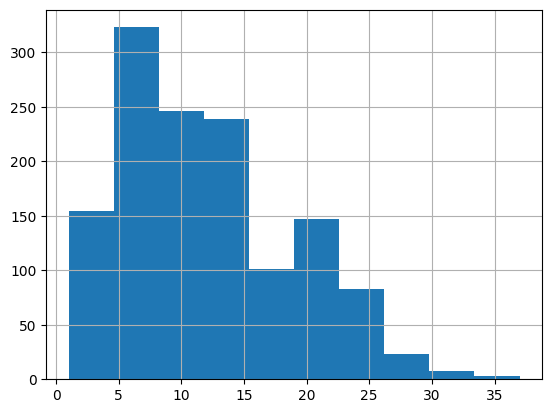

In [67]:
sentiment['Length_Text'].hist()

<Axes: >

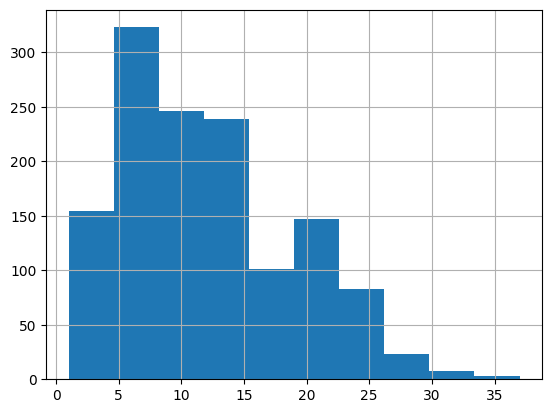

In [68]:
train['Length_Text'].hist()

# Converting to train and test dataset

In [69]:
X_train, X_test, y_train, y_test = sentiment['Text'], train['Text'], sentiment['Sentiment'], train['Sentiment']

## Label encoding

In [70]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Text Tokenizing

In [71]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    )

train_encodings = tokenize_data(X_train, tokenizer)
test_encodings = tokenize_data(X_test, tokenizer)


## Converting to torch dataset

In [72]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_dataset = SentimentDataset(train_encodings, y_train_encoded)
test_dataset = SentimentDataset(test_encodings, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


# BERT (Bidirectional Encoder Representations from Transformers)

## Model

In [73]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
optimizer = AdamW(model.parameters(), lr=5e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\hadik\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## Training

In [74]:
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")


Epoch 1, Loss: 0.4933426103678094
Epoch 2, Loss: 0.2954377190445561
Epoch 3, Loss: 0.24130201634827508
Epoch 4, Loss: 0.16209718181067204
Epoch 5, Loss: 0.12063082923035486


## Testing

In [75]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

    Negative       0.99      0.91      0.95       161
     Neutral       0.98      0.97      0.97       187
    Positive       0.98      0.99      0.99       979

    accuracy                           0.98      1327
   macro avg       0.98      0.96      0.97      1327
weighted avg       0.98      0.98      0.98      1327



## Saving the model

In [76]:
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')

('./sentiment_model\\tokenizer_config.json',
 './sentiment_model\\special_tokens_map.json',
 './sentiment_model\\vocab.txt',
 './sentiment_model\\added_tokens.json')

#

# Sentiment analysis from BERT trained model

In [77]:
model = BertForSequenceClassification.from_pretrained('./sentiment_model')
tokenizer = BertTokenizer.from_pretrained('./sentiment_model')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [78]:
def predict_sentiment(text, model, tokenizer, label_encoder):
    inputs = tokenizer(
        text, 
        return_tensors="pt", 
        truncation=True, 
        padding="max_length", 
        max_length=128
    )
    
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
    
    predicted_sentiment = label_encoder.inverse_transform([predicted_class])[0]
    return predicted_sentiment


In [79]:
custom_text = "dut... dut... mana makanan gratis yang kau janjikan itu hah wo?"

custom_text = Text_deep_cleaning(custom_text)

predicted_sentiment = predict_sentiment(custom_text, model, tokenizer, label_encoder)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: Neutral
